# Graduate Admission Predictor

> Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

> To further support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy
League colleges, considering the unique perspective of Indian applicants.

> By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
factors impacting graduate admissions and their interrelationships. Additionally, we can
provide predictive insights to determine an individual's admission chances based on
various variables.

## Problem Statement

1. Find the factores impacting the graduste admissions and their inter-relationships.
2. Predictions based on the factors if the student can get admission into Ivy colleges.
3. Insights and Recommendations

### Essential Librariers

In [1658]:
# Importing essential libraries for numerical computations, data manipulation, and visualization
import numpy as np  # For numerical operations, working with arrays
import pandas as pd  # For data manipulation and analysis using DataFrames

# Libraries for data visualization
import matplotlib.pyplot as plt  # For basic plotting (line, bar, scatter, etc.)
import seaborn as sns  # For advanced and visually appealing statistical plots

# Libraries for statistical analysis
import scipy.stats as stats  # For performing statistical tests and probability distributions
import statsmodels.api as sm  # For statistical modeling (regression, time series analysis, etc.)
import statsmodels.stats.api as sms  # For statistical tests and diagnostic tools in models

# Scikit-learn utilities for machine learning
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression  # For simple and multiple linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression models

# Data scaling techniques
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For normalizing or standardizing features

# Regularized regression techniques
from sklearn.linear_model import Ridge, Lasso, ElasticNet  # For regression with L2 (Ridge), L1 (Lasso), and both (ElasticNet) penalties

# For checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To calculate VIF for detecting multicollinearity
from statsmodels.tools.tools import add_constant  # To add a constant (intercept) to the model manually


### Data Ingestion and Column details

In [1659]:
data = pd.read_csv(r'C:\Git_Projects\Graduate_Admission_Predictor\data\Graduate_Admission.csv')

In [1660]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### Column Info

> **Serial No.**: This column represents the unique row identifier for each applicant in the
dataset.

>**GREScores**:This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.

> **TOEFLScores**: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.

> **University Rating**: This column indicates the rating or reputation of the university that
the applicants are associated with. Therating is based on a scale of 0 to 5, with 5 representing the highest rating.

> **SOP**:This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.

> **LOR**:This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.

> **CGPA**:This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.

> **Research**: This column indicates whether the applicant has research experience (1) or
not (0).

> **ChanceofAdmit**: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

### 1. Exploring the Dataset

#### Checking the shape of the dataset

In [1661]:
data.shape

(500, 9)

#### Checking the information and datatypes of the dataset

In [1662]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Observations:
- The data doesnot have null values.
- All the data is numerical.
- Serial number being the **Primary key**. 

#### Range of the attributes usiing `describe()`.

In [1663]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Observations:
- As established earlier the `Serial No` is the primary key, as it has count of 500, with min as 1 amnd max as 500.
- GRE score ranges from [290.00, 340.00], mean and median are close, which may indicate that they significant amount of outliers.
- TOEFL score ranges from [92.00, 120.00], mean and median are close, which may indicate that they significant amount of outliers.
- University ratings are on a scale of 1-5. 
- SOP ratings are on a scale of 1-5. 
- LOR ratings are on a scale of 1-5. 
- CGPA ranges from [6.80, 9.92], mean and median are close, which may indicate that they significant amount of outliers.
-----


### 2. Data Cleaning

#### a. Drop the irrelevant columns

The `Serial No` column introduces the ordinality, this affects the ML alogrithm predictions. Therefore dropping the column.
 

In [1664]:
data.drop(columns=['Serial No.'], inplace=True)

#### b. Checking for null values

In [1665]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### c. Checking the uniformity of the column names and Categorical features

In [1666]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [1667]:
# It can be oberserved that the column names `LOR`, `Chance of Admit` have trailing spaces.
# Removing trailing spaces from column names
data.columns = data.columns.str.strip()

In [1668]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

#### d. Checking for duplicate values

In [1669]:
data[data.duplicated()]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


Observations:
- There are no duplicates in the dataset.
-----

### 2. Graphical Analysis

#### Unnivariate Analysis

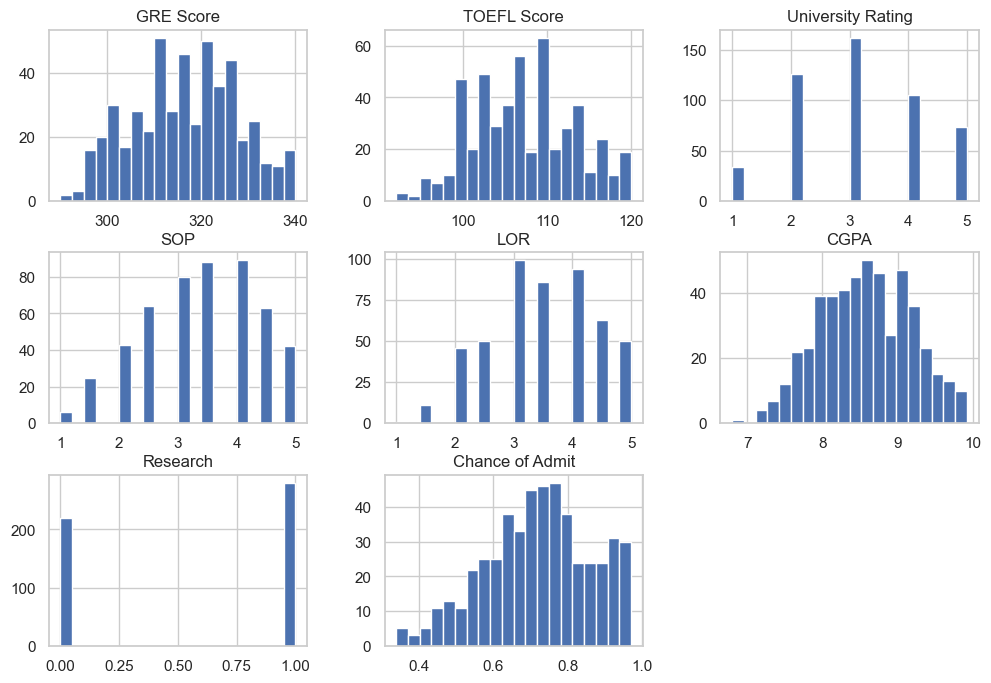

In [1670]:
data.hist(figsize=(12, 8), bins=20)
plt.show()

In [1671]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [1672]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

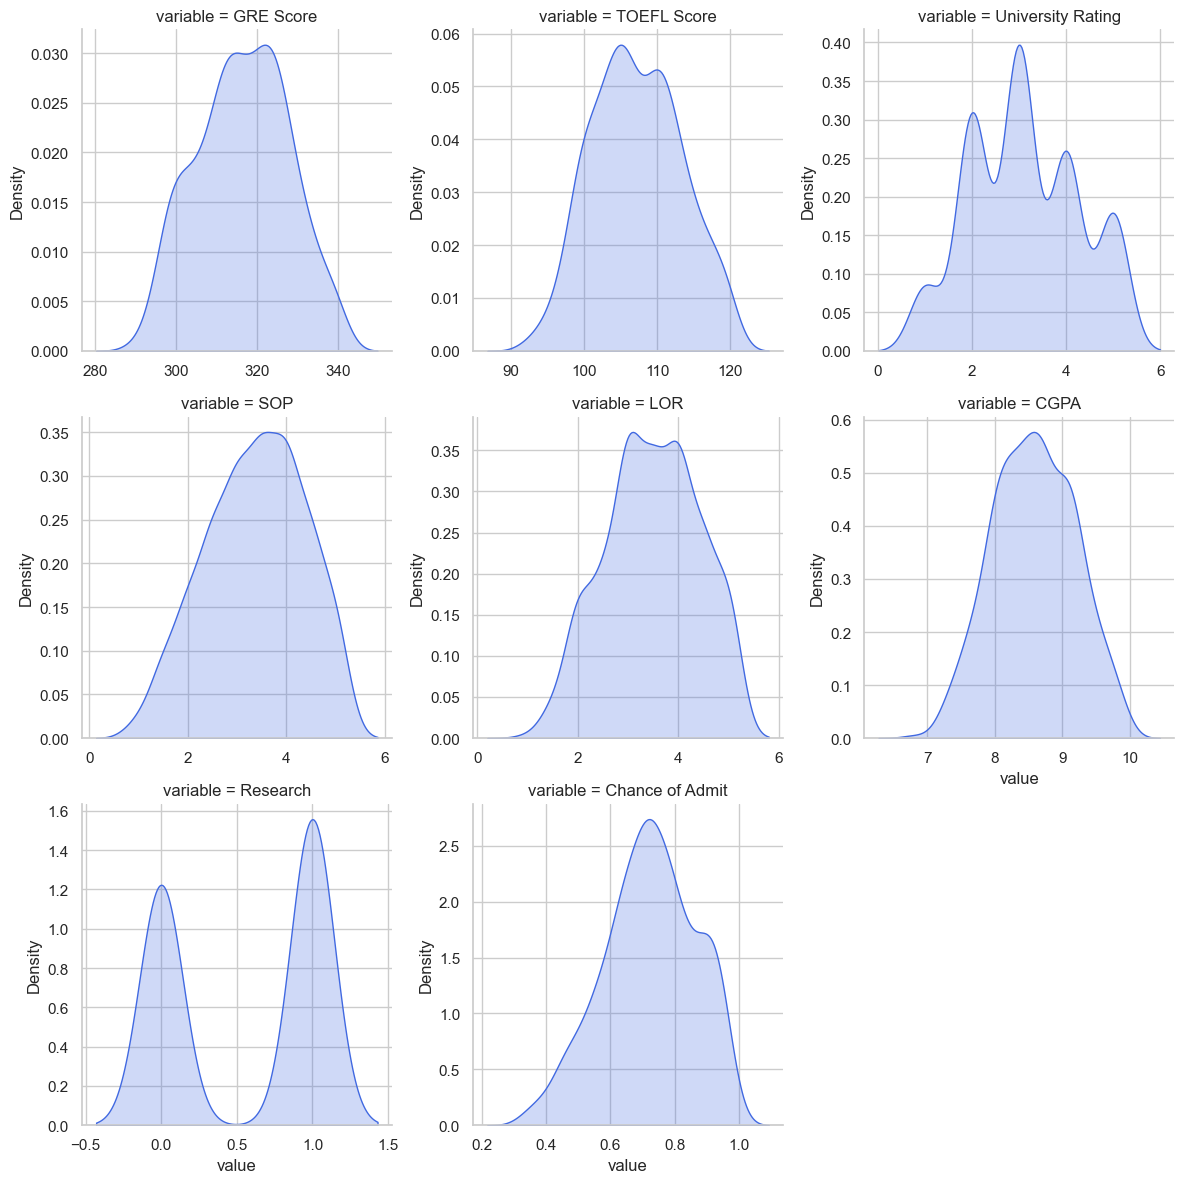

In [1673]:
g = sns.FacetGrid(pd.melt(data[columns]), col="variable", col_wrap=3, sharex=False, sharey=False, height=4)

# Map KDE plot to each subplot
g.map(sns.kdeplot, "value", fill=True, color="royalblue")

# Customize
for ax in g.axes.flatten():
    ax.set_ylabel("Density")
    ax.grid(True)

plt.show()


C:\Users\sreem\AppData\Local\Temp\ipykernel_15672\633951907.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha="right")


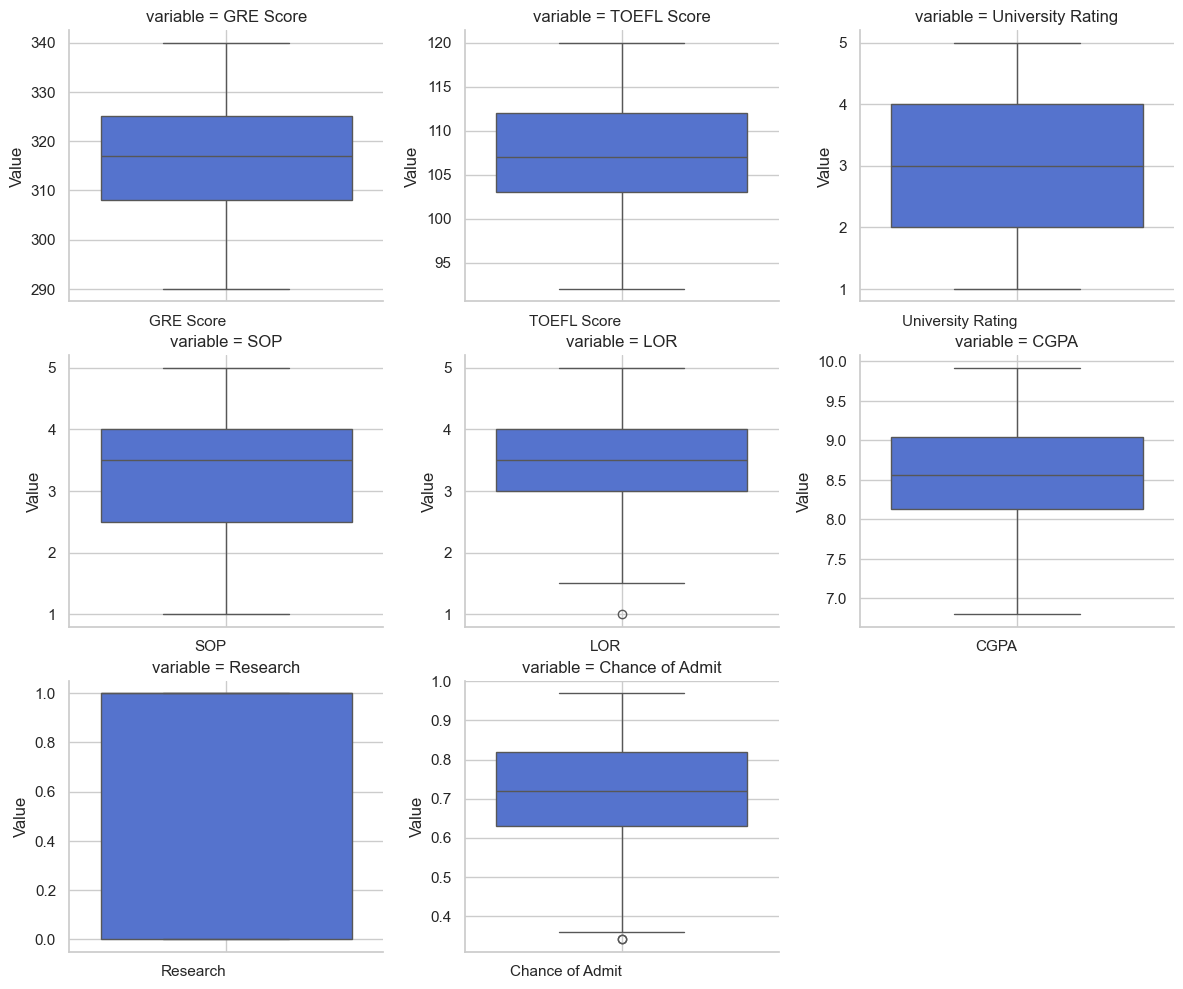

In [1674]:
g = sns.FacetGrid(pd.melt(data[columns]), col="variable", col_wrap=3, sharex=False, sharey=False, height=4)

# Ensure vertical boxplots
g.map_dataframe(sns.boxplot, x="variable", y="value", color="royalblue")

# Customize
for ax in g.axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Value")
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")
    ax.tick_params(axis="x")  # Rotate labels for readability
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase bottom padding
plt.show()


#### Bi-variate Analysis

#### Relation between GRE vs Chance of Admit

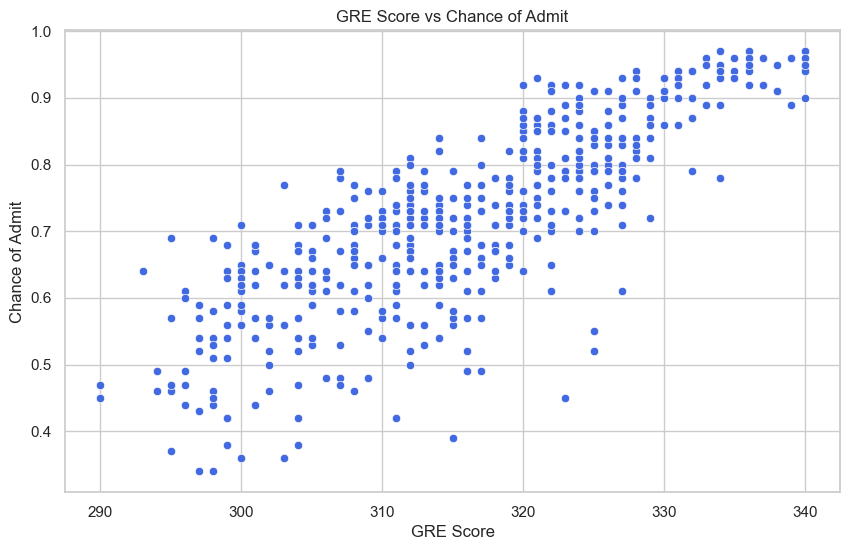

In [1675]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=data, color='royalblue')
plt.title('GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

Observation:
- From the above graph, it may be considered that there is a positive co-relation between the GRE score and Chance of Admit.

#### Relation between TOFL score and Chance of Admit.

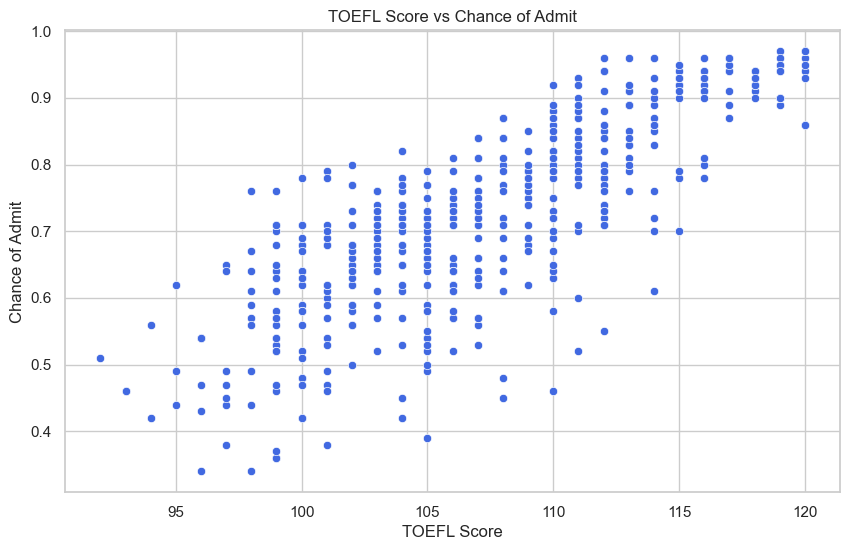

In [1676]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=data, color='royalblue')
plt.title('TOEFL Score vs Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

Observation:
- From the above graph, it may be considered that there is a positive co-relation between the GRE score and Chance of Admit.
- A better co-relation when GRE score.

C:\Users\sreem\AppData\Local\Temp\ipykernel_15672\1259231493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Research", y="Chance of Admit", palette="muted")


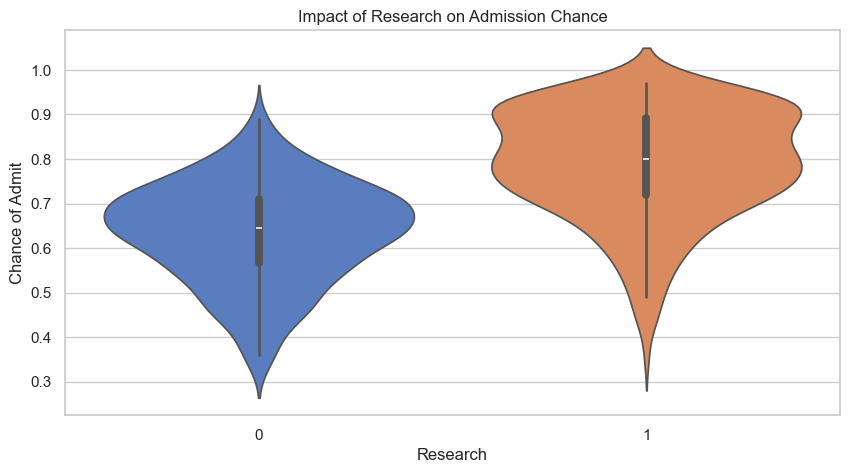

In [1677]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x="Research", y="Chance of Admit", palette="muted")
plt.title("Impact of Research on Admission Chance")
plt.show()


Observations:
**1. Research Experience Boosts Admission Chances**  
- Applicants **with research experience (1)** have a **higher median chance of admission** (~0.8) compared to those without research (0) (~0.7).  
- The **upper quartile (75th percentile)** for research candidates reaches close to **0.9**, while non-research candidates max out around **0.8**.  

**2. Wider Spread for Research Candidates**  
- The **violin shape is wider** for **Research = 1**, indicating:  
  - More **variability** in admission chances (some candidates perform exceptionally well).  
  - A **longer upper tail** suggests that research experience may help some applicants achieve very high admission probabilities.  

**3. Non-Research Applicants Have a Compact Distribution**  
- **Research = 0** has a **narrower distribution**, meaning:  
  - Most applicants without research fall in a **smaller range (0.6–0.8)**.  
  - Fewer outliers or extreme high performers.  


#### How University ratiings affect Chance of Admit

In [1678]:
data['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

C:\Users\sreem\AppData\Local\Temp\ipykernel_15672\3112324426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='University Rating', y='Chance of Admit', palette='muted')


Text(0.5, 0, 'University Rating')

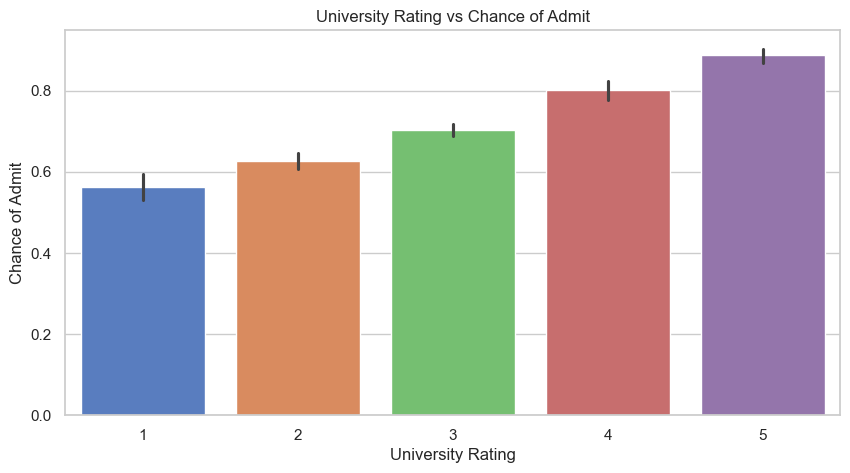

In [1679]:
data['University Rating']= data['University Rating'].astype('category')
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='University Rating', y='Chance of Admit', palette='muted')
plt.title('University Rating vs Chance of Admit')
plt.xlabel('University Rating')

#### Pair plot of other features wrt target varaible.

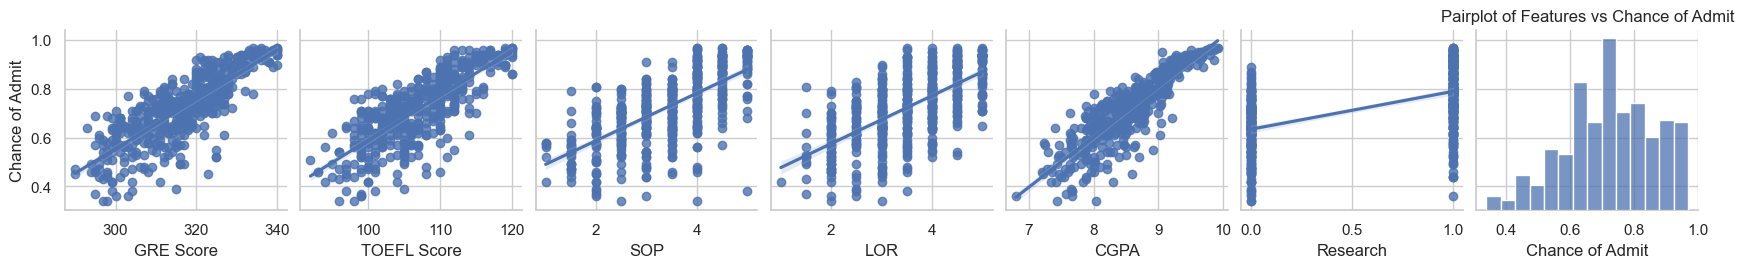

In [1680]:
sns.set(style="whitegrid")

sns.pairplot(data=data, y_vars='Chance of Admit',kind = 'reg')
plt.title('Pairplot of Features vs Chance of Admit')
plt.show()

Observations:
- The exam scores - `GRE, TOEFL, CGPA` have high positive co-relation with the target variable `Chance of Admit`.
- The impact of the SOP and LOR have some impact, Research is only variable that doesnot have an effect on the Target variables.
- We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

c:\Git_Projects\Graduate_Admission_Predictor\venv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


Text(0.5, 1.0, 'Pairplot of Features vs Chance of Admit')

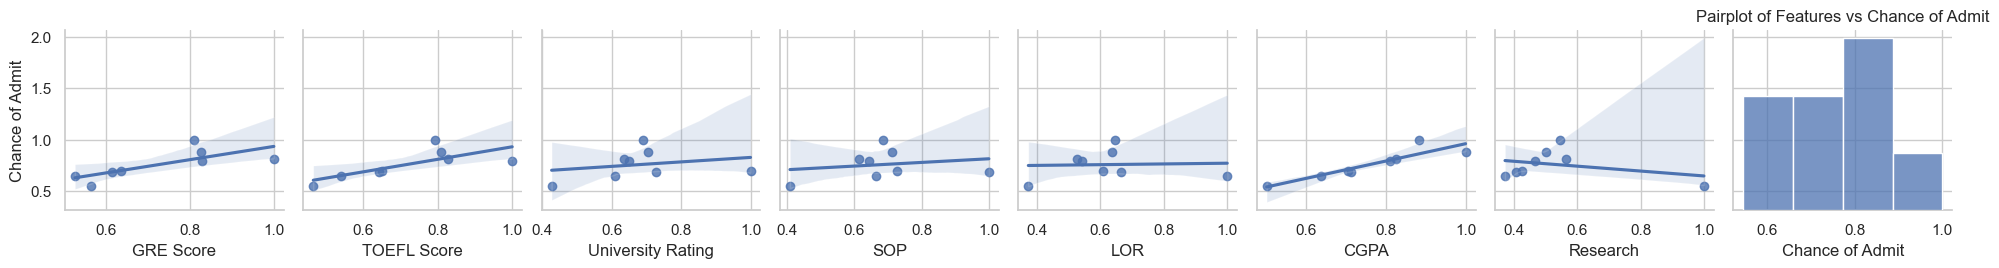

In [1681]:
# data.corr()Computes the correlation matrix (Pearson correlation coefficients) between all numerical columns.
# Only includes columns with strong linear relationships (values between -1 and 1)
sns.pairplot(data= data.corr(), y_vars='Chance of Admit', kind = 'reg',palette='muted')
plt.title('Pairplot of Features vs Chance of Admit')

Observations:
- Prioritize TOEFL/GRE Scores: They have the strongest correlation with admission success.

- Research is a Bonus: Helpful but not a game-changer alone.

- University Rating Matters Less: Focus on strengthening the profile based on the other features.

#### HeatMap

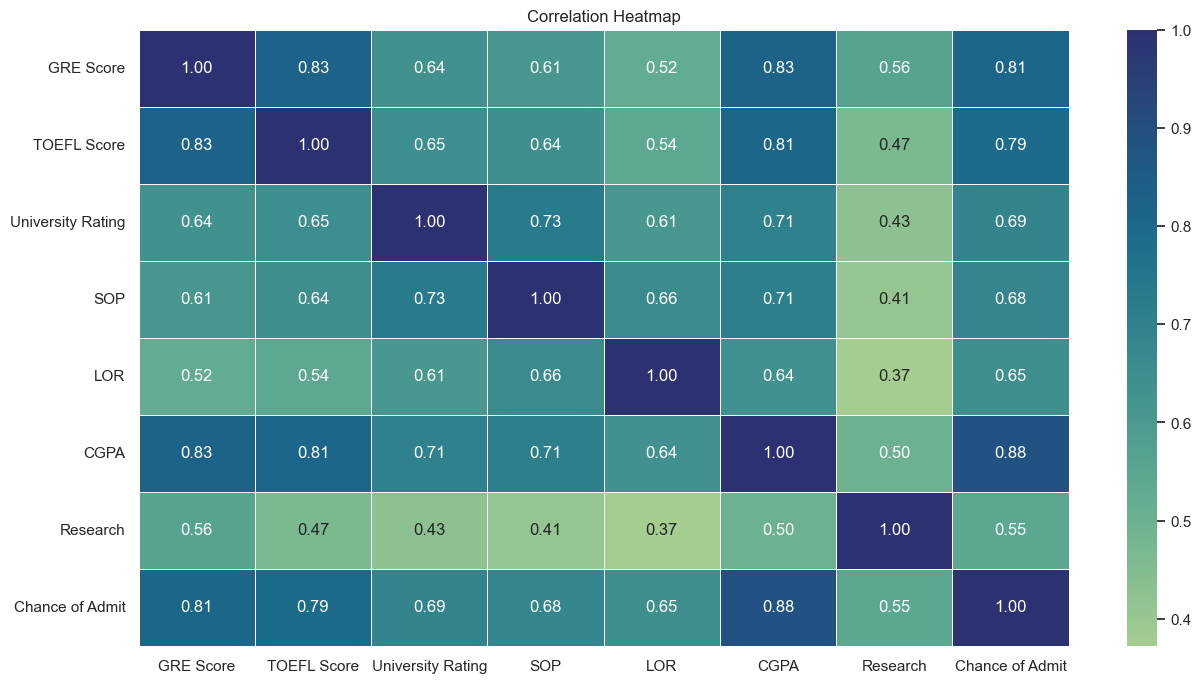

In [1682]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Observations:

> Highly corelated features order wise:
1. CGPA vs Chance of Admit
2. CGPA vs GRE score, TOEFL vs GRE score
3. GRE score vs Chance of Admit
4. SOP vs University Rating
5. TOEFL vs Chance of Admit
-----


### 3. Data Preprocessing

#### Outlier Detection

##### Univariate Detection

In [1683]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

In [1684]:
num_cols

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

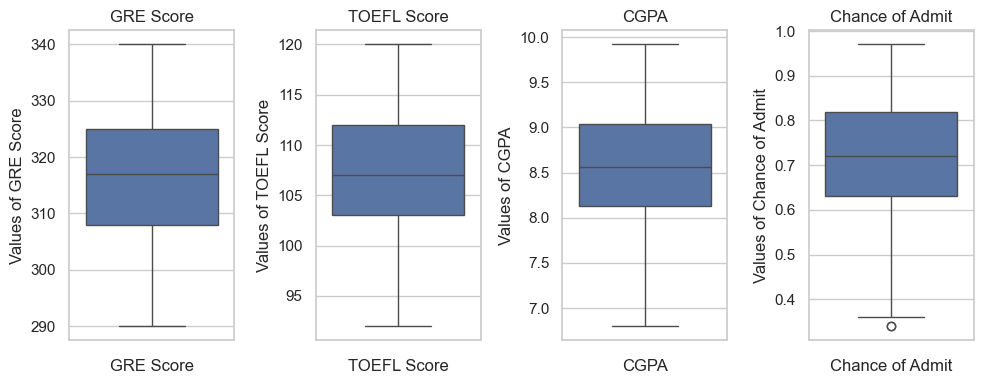

In [1685]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in num_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(data[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

Observations:
- It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)

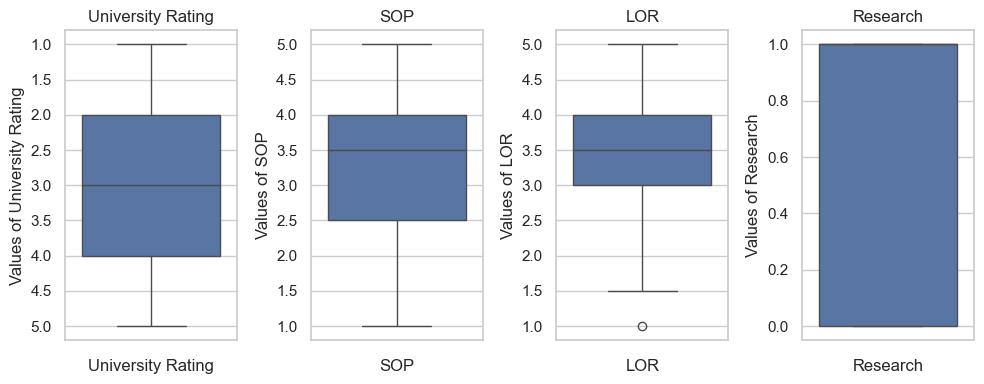

In [1686]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in cat_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(data[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

#### Missing Value Treatment

- There are no missing values in the dataset are per analysis in second section.      

#### Duplicate Value Check

- There are no duplicate values in the dataset as per analysis in the second section.

#### Feature Engineering

- All the required data is present in the dataset, Which requires no need for creation of new columns.

Observations:
- There are no significant Univariate outliers present in the dataset. 
- There are no missing values or duplicate values present in the data.
- As all the significant column values are present, therefore no requirement for derived columns.

Insights:
- Multivaraite outlier detection can be used for further indepth processing.

### 4. Data Splitting and Modeling

#### Seperating the dataset from the Target Variable

In [1687]:
data['University Rating'] = data['University Rating'].astype('int64')

In [1688]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [1689]:
# Separating the features and target variable
# Target variable
y = data['Chance of Admit']

# Features
# Dropping the target variable from the dataset
X = data.drop(columns=['Chance of Admit'], axis=1)

y.shape, X.shape

((500,), (500, 7))

#### Splitting the Dataset

In [1690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1691]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [1692]:
y_train.shape, y_test.shape

((400,), (100,))

In [1693]:
type(X_train)

pandas.core.frame.DataFrame

In [1694]:
# Check if indices of X_train and y_train match
print(X_train.index.equals(y_train.index))  # Returns True if they are the same

True


#### Scaling the Dataset

In [1695]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1696]:
type(X_train)

numpy.ndarray

The result of the transformed data is in the form of an array. Converting the same to a DataFrame for ease of processing.

In [1697]:
cols = data.columns
cols[:-1]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [1698]:
# Conversion of the numpy array to a pandas DataFrame for X_train and X_test
X_train = pd.DataFrame(X_train, columns = cols[:-1])
X_test = pd.DataFrame(X_test, columns = cols[:-1])

# Resetting the index for X_train, X_test, y_train, and y_test to align them properly
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# For y_train and y_test, reset the index to align with X_train and X_test
y_train = pd.Series(y_train)  # Convert y_train to a pandas Series if it's not already
y_test = pd.Series(y_test)    # Convert y_test to a pandas Series if it's not already

# Resetting the index of y_train and y_test
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Now, you can safely check the heads of X_train and y_train
X_train.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [1699]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434


In [1700]:
y_train.head()

0    0.77
1    0.71
2    0.62
3    0.72
4    0.75
Name: Chance of Admit, dtype: float64

In [1701]:
y_test.head()

0    0.93
1    0.84
2    0.39
3    0.77
4    0.74
Name: Chance of Admit, dtype: float64

In [1702]:
# Check if indices of X_train and y_train match
print(X_train.index.equals(y_train.index))  # Returns True if they are the same

True


#### Checking for Co-relation between GRE TOEFL scores on Admission Chance


In [1703]:
# H0: There is no correlation between the features and the target variable
# H1: There is a correlation between the features and the target variable

pearson_corr, pval = stats.pearsonr(X_train['GRE Score'], y_train)
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {pval}")
# Interpretation of the p-value
if pval < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between GRE Score and Chance of Admit.")
else:   
    print("Fail to reject the null hypothesis: There is no significant correlation between GRE Score and Chance of Admit.")

Pearson correlation coefficient: 0.8205093412016368
P-value: 1.0467300468872709e-98
Reject the null hypothesis: There is a significant correlation between GRE Score and Chance of Admit.


In [1704]:
# H0: There is no correlation between the features and the target variable
# H1: There is a correlation between the features and the target variable

pearson_corr, pval = stats.pearsonr(X_train['TOEFL Score'], y_train)
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {pval}")
# Interpretation of the p-value
if pval < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between TOEFL Score and Chance of Admit.")
else:   
    print("Fail to reject the null hypothesis: There is no significant correlation between TOEFL Score and Chance of Admit.")

Pearson correlation coefficient: 0.7892581673741235
P-value: 2.5833321855687774e-86
Reject the null hypothesis: There is a significant correlation between TOEFL Score and Chance of Admit.


Observations:
- Significant corelation identified between GRE with Chance of Admit and TOEFL score and Chance of Admit.
- Multi colinearity has to be verified after scaling the features.
-----

### 5. Model Building

#### Building the Linear Regression Model using Sklearn

In [1705]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Co-efficents of the model

In [1706]:
model.coef_

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

Intercept/Bias of the model
- If we put all weights=0, then y_hat = model intercept. This implies that iti s the intersection of hyperplane with y_hat axis.

In [1707]:
model.intercept_

0.7241749999999999

In [1708]:
y_pred_train = model.predict(X_train)
y_pred_test= model.predict(X_test)

Text(0, 0.5, 'Predicted Values(y_pred_test)')

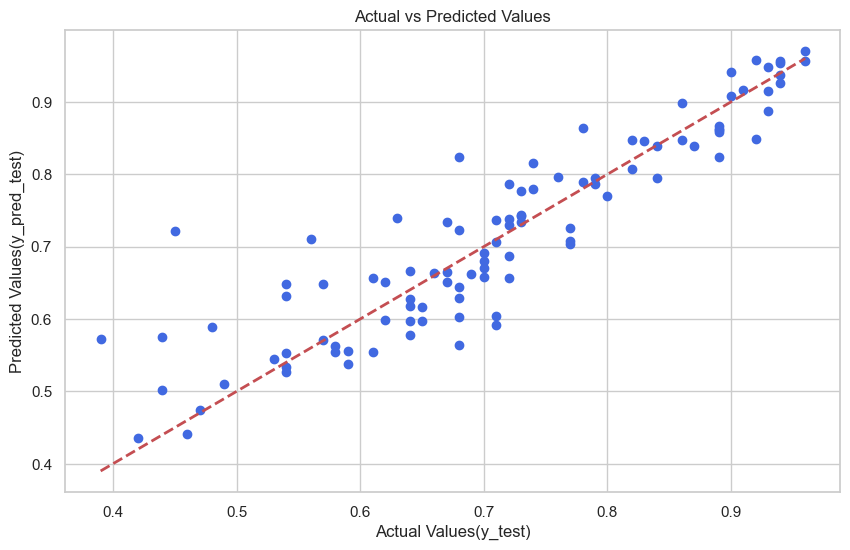

In [1709]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values(y_test)')
plt.ylabel('Predicted Values(y_pred_test)')  


#### Metrics

In [1710]:
y_test.shape, y_pred_test.shape

((100,), (100,))

In [1711]:
def mean_squared_error(y_test, y_pred_test):
    mse = np.mean((y_test - y_pred_test) ** 2)
    return mse

def mean_absolute_error(y_test, y_pred_test):
    return np.mean(np.abs(y_test - y_pred_test))

def root_mean_squared_error(y_test, y_pred_test):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return rmse

def r_squared(y_test, y_pred_test):
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_residual = np.sum((y_test - y_pred_test) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def adjusted_r_squared(y_test, y_pred_test, n, p):
    r2 = r_squared(y_test, y_pred_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r_squared(y_test, y_pred_test)
adjusted_r2 = adjusted_r_squared(y_test, y_pred_test, n=len(y_test), p=X_test.shape[1])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Mean Squared Error: 0.0037046553987884114
Mean Absolute Error: 0.04272265427705367
Root Mean Squared Error: 0.06086588041578312
R-squared: 0.8188432567829628
Adjusted R-squared: 0.8050595915381882


Observations:
- It can be obaserved that adjusted r2 square and r2 sqaure are similar, indicating that all the features have siginificant contribution to model.

#### Displaying Model Co-efficients with Column names

In [1712]:
feature_coeff = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
feature_coeff = feature_coeff.sort_values(by='Coefficient', ascending=False)
feature_coeff.reset_index(inplace=True)
feature_coeff.columns = ['Feature', 'Coefficient']

In [1713]:
feature_coeff

,Feature,Coefficient
0,CGPA,0.067581
1,GRE Score,0.026671
2,TOEFL Score,0.018226
3,LOR,0.015866
4,Research,0.011940
5,University Rating,0.002940
6,SOP,0.001788


C:\Users\sreem\AppData\Local\Temp\ipykernel_15672\4073512791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_coeff, palette='muted')


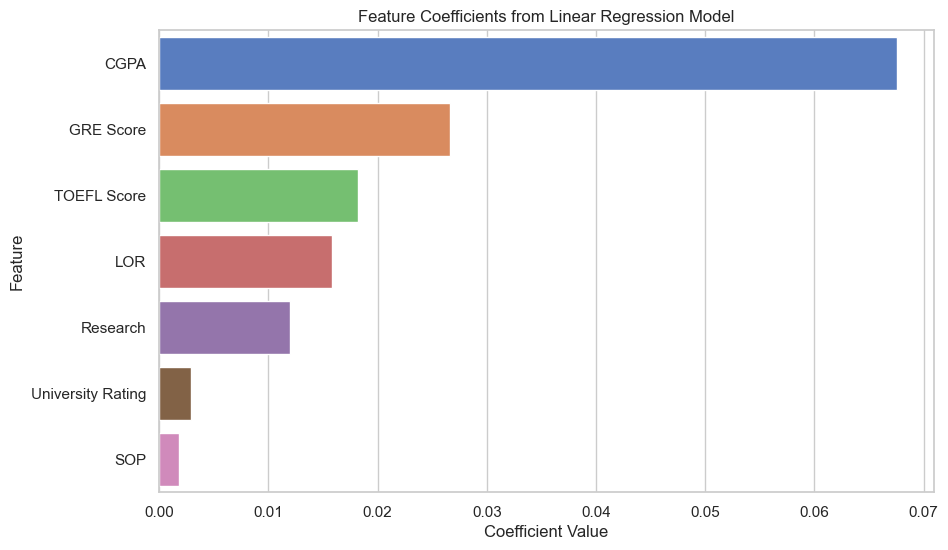

In [1714]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coeff, palette='muted')
plt.title('Feature Coefficients from Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Observations:
- The most significant feature is the CGPA, followed by GRE and TOEFL scores.
- The least significant feature is SOP.

#### Building Linear regression model using statsmodel Ordinary Least square method

In [1715]:
X_train_sm = sm.add_constant(X_train) #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_train_sm).fit()
results = sm_model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          3.41e-142
Time:                        13:39:38   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

**Observations**
- Durbin watson test shows values is near 2. So it indicates that there is no Auto correlation among features. 
- High F-Stat and Lower prob(F-stat) indicates that we have provided relevant features to the model.
- Among all the features, `University Rating, SOP` Features have higher p value indicating that these two features are less affecting the target variable compared to others features.

-----

### 6. Testing the Assumptions of Linear Regression Model.

#### a. Multi-colinearity check

> VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

> The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

> Where: j represents the jth predictor variable. R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables

In [1716]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.654540
0,GRE Score,4.489983
1,TOEFL Score,3.664298
3,SOP,2.785764
2,University Rating,2.572110
4,LOR,1.977698
6,Research,1.518065


Observations:
- The VIF score of the features are below 10, indicating that there is no requirment for any removal of the features.
- It is important to note that the Multi-colinearity check has to performed after scaling the features.

#### b. Mean of Residuals

- The mean of residuals represents the average of residual values in a regression model.
- Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.  
- The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. 
- However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.
- **The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.**

In [1717]:
residuals = y_test.values - y_pred_test
residuals.mean()

-0.005453623717661267

In [1718]:
residuals_train = y_train.values - y_pred_train
residuals_train.mean()

1.4599432773820808e-16

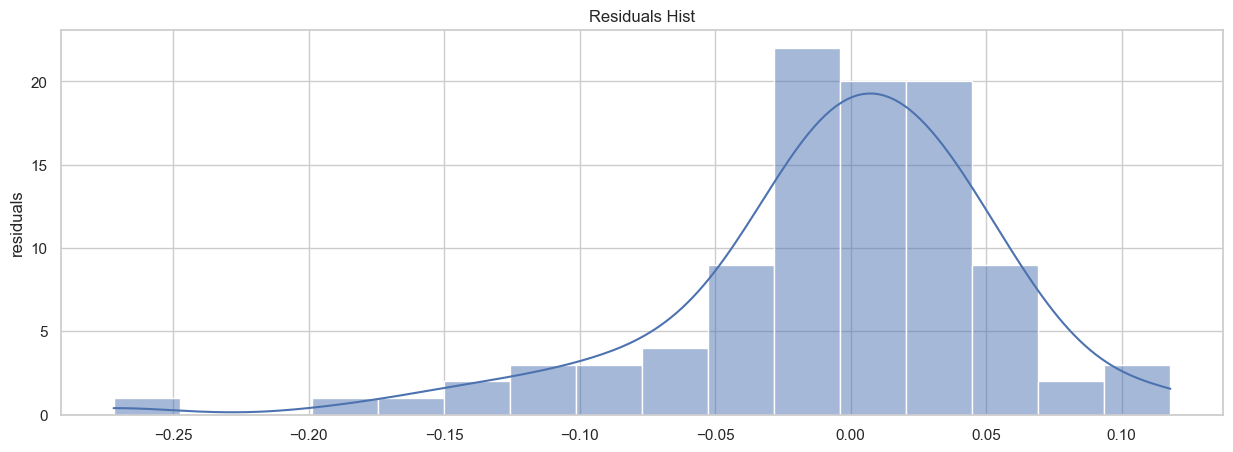

In [1719]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True)
plt.title('Residuals Hist')
plt.ylabel("residuals")
plt.show()

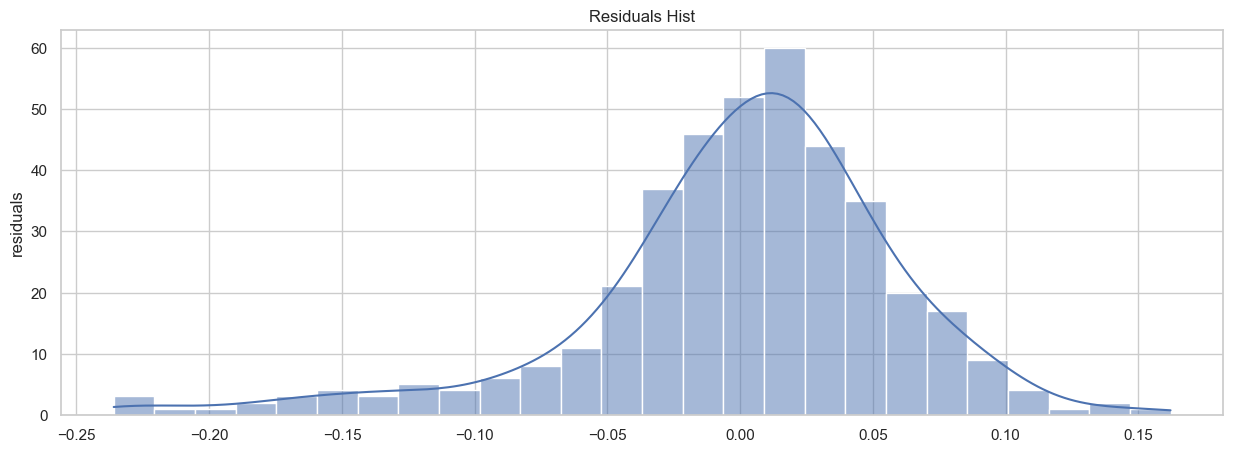

In [1720]:
plt.figure(figsize=(15,5))
sns.histplot(residuals_train, kde= True)
plt.title('Residuals Hist')
plt.ylabel("residuals")
plt.show()

Observations:
- It can be observed that the train and test **residuals** are slighlty deviated from normal distribution.
- Also the *means* of the residuals are near to 0, indicating the Model is **not biased**.

#### c. Normality of Residuals

##### QQ plot

<Figure size 1500x500 with 0 Axes>

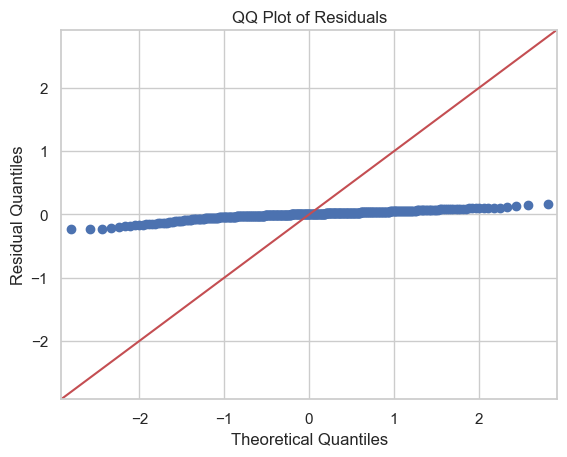

In [1721]:
# QQ-Plot of residuals
plt.figure(figsize=(15,5))
sm.qqplot(residuals_train,line='45')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

##### Jarque-Bera Test

In [1649]:
jb_stat, jb_p_value = stats.jarque_bera(residuals)


print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)

if jb_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 74.10190609972108
p-value: 8.109153870349678e-17
Reject the null hypothesis: Residuals are not normally distributed.


Observations:
- With the observations derived from the hist plot, QQ plot, Jarque-Bera Test, It can be confirmed that the residuals are not Normally Distributed.
- This may indicate that the metrics thus obtained from the model are not certain.

Insights:
- Therefore using other Models like Random Forest, XgBoost models may result in better accuracy.

#### d. Homoscedasticity

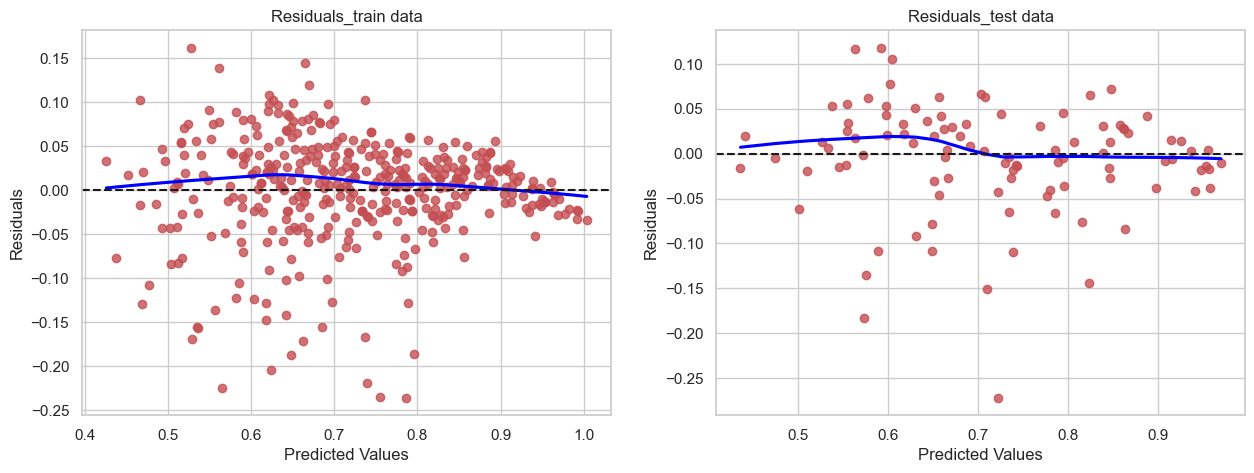

In [1650]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data')
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='r',line_kws={'color': 'blue'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data')
sns.regplot(x=y_pred_test, y=residuals, lowess=True,color='r' ,line_kws={'color': 'blue'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Observations:
> What to Observe in the plots
- **No Clear Pattern**:

The blue LOWESS (locally weighted regression) curve is roughly horizontal and flat.

This means that the variance is constant and the model has captured the data trend well.

- **Constant Spread of Points**:

The red dots (residuals) are scattered randomly and evenly around the horizontal line (y = 0).

There shouldn't be a cone shape or curves – these would suggest heteroscedasticity (unequal variance).

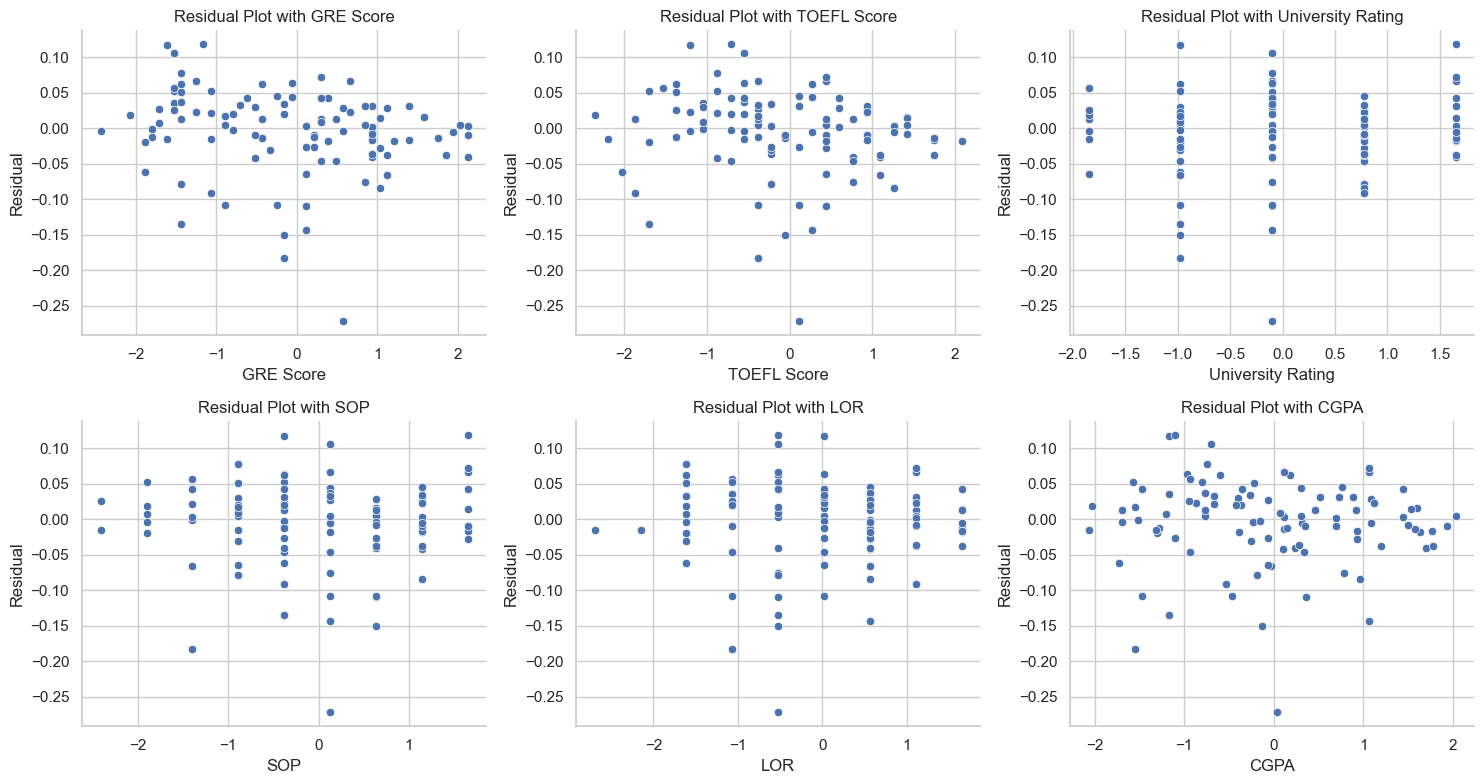

In [1651]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(15,8))
i=1
for col in X_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=X_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
    plt.title(f'Residual Plot with {col}')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

##### Applying homoscedasticity hypothesis tests on lr_model

Breusch-Pagan test and Goldfeldt quandt test for Homoscedasticity

- Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
- Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

In [1652]:
# Ensure X_test includes constant (intercept)
X_test_with_const = sm.add_constant(X_test, has_constant='add')
# 1. Breusch-Pagan Test for Homoscedasticity
bp_test_results = sms.het_breuschpagan(residuals, X_test_with_const)

# Creating DataFrame for Breusch-Pagan Test results
bp_test = pd.DataFrame(bp_test_results, 
                       columns=['value'], 
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

# 2. Goldfeld-Quandt Test for Homoscedasticity
gq_test_results = sms.het_goldfeldquandt(residuals, X_test_with_const)
gq_test_df = pd.DataFrame([gq_test_results], columns=['Test Statistic', 'p-value','Trend'])

# Print Breusch-Pagan Test results
print("Breusch-Pagan Test Results:")
print(bp_test)

# Print Goldfeld-Quandt Test results
print("\nGoldfeld-Quandt Test Results:")
print(gq_test_df)

# Interpretation for Breusch-Pagan Test
bp_p_value = bp_test.loc['p-value', 'value']
if bp_p_value < 0.05:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

# Interpretation for Goldfeld-Quandt Test
gq_p_value = gq_test_df.loc[0, 'p-value']
if gq_p_value < 0.05:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")



Breusch-Pagan Test Results:
                                  value
Lagrange multiplier statistic  8.319752
p-value                        0.305245
f-value                        1.192681
f p-value                      0.314841

Goldfeld-Quandt Test Results:
   Test Statistic   p-value       Trend
0        0.542122  0.974838  increasing

Breusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).
Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).


In [1653]:
# 1. White Test for Homoscedasticity
white_test_results = sms.het_white(residuals, X_test_with_const)

# 2. Creating DataFrame for White Test results
white_test_df = pd.DataFrame(white_test_results, 
                             columns=['value'], 
                             index=['Test Statistic', 'p-value', 'f-value', 'f p-value'])

# Print White Test results
print("\nWhite Test Results:")
print(white_test_df)

# Interpretation for White Test
white_p_value = white_test_df.loc['p-value', 'value']
if white_p_value < 0.05:
    print("\nWhite Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nWhite Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")


White Test Results:
                    value
Test Statistic  27.464310
p-value          0.778642
f-value          0.723855
f p-value        0.846821

White Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).


##### Applying homoscedasticity hypothesis tests on sm_model ols

In [1654]:
# 1. Breusch-Pagan Test for Homoscedasticity
residuals = sm_model.resid
bp_test_results = sms.het_breuschpagan(residuals, sm_model.model.exog)

# Creating DataFrame for Breusch-Pagan Test results
bp_test = pd.DataFrame(bp_test_results, 
                       columns=['value'], 
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

# 2. Goldfeld-Quandt Test for Homoscedasticity
gq_test_results = sms.het_goldfeldquandt(residuals, sm_model.model.exog)
gq_test_df = pd.DataFrame([gq_test_results], columns=['Test Statistic', 'p-value','Trend'])

# Print Breusch-Pagan Test results
print("Breusch-Pagan Test Results:")
print(bp_test)

# Print Goldfeld-Quandt Test results
print("\nGoldfeld-Quandt Test Results:")
print(gq_test_df)

# Interpretation for Breusch-Pagan Test
bp_p_value = bp_test.loc['p-value', 'value']
if bp_p_value < 0.05:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

# Interpretation for Goldfeld-Quandt Test
gq_p_value = gq_test_df.loc[0, 'p-value']
if gq_p_value < 0.05:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")



Breusch-Pagan Test Results:
                                   value
Lagrange multiplier statistic  25.155866
p-value                         0.000712
f-value                         3.758171
f p-value                       0.000588

Goldfeld-Quandt Test Results:
   Test Statistic   p-value       Trend
0        0.950688  0.636785  increasing

Breusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).
Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).


In [1655]:
# 1. White Test for Homoscedasticity
white_test_results = sms.het_white(sm_model.resid, sm_model.model.exog)

# 2. Creating DataFrame for White Test results
white_test_df = pd.DataFrame(white_test_results, 
                             columns=['value'], 
                             index=['Test Statistic', 'p-value', 'f-value', 'f p-value'])

# Print White Test results
print("\nWhite Test Results:")
print(white_test_df)

# Interpretation for White Test
white_p_value = white_test_df.loc['p-value', 'value']
if white_p_value < 0.05:
    print("\nWhite Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nWhite Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")


White Test Results:
                    value
Test Statistic  66.143166
p-value          0.000786
f-value          2.126859
f p-value        0.000379

White Test Interpretation: Heteroscedasticity is present (p-value < 0.05).


##### Applying log transformation to y_train to check if heteroscedasticity changes

In [1656]:
y_train_log = np.log(y_train)
sm_model_log = sm.OLS(y_train_log, sm.add_constant(X_train)).fit()

In [1657]:
# 1. Breusch-Pagan Test for Homoscedasticity
residuals = sm_model_log.resid
bp_test_results = sms.het_breuschpagan(residuals, sm_model.model.exog)

# Creating DataFrame for Breusch-Pagan Test results
bp_test = pd.DataFrame(bp_test_results, 
                       columns=['value'], 
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

# 2. Goldfeld-Quandt Test for Homoscedasticity
gq_test_results = sms.het_goldfeldquandt(residuals, sm_model.model.exog)
gq_test_df = pd.DataFrame([gq_test_results], columns=['Test Statistic', 'p-value','Trend'])

# Print Breusch-Pagan Test results
print("Breusch-Pagan Test Results:")
print(bp_test)

# Print Goldfeld-Quandt Test results
print("\nGoldfeld-Quandt Test Results:")
print(gq_test_df)

# Interpretation for Breusch-Pagan Test
bp_p_value = bp_test.loc['p-value', 'value']
if bp_p_value < 0.05:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

# Interpretation for Goldfeld-Quandt Test
gq_p_value = gq_test_df.loc[0, 'p-value']
if gq_p_value < 0.05:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

Breusch-Pagan Test Results:
                                      value
Lagrange multiplier statistic  4.092473e+01
p-value                        8.369823e-07
f-value                        6.382464e+00
f p-value                      4.026393e-07

Goldfeld-Quandt Test Results:
   Test Statistic   p-value       Trend
0        0.847129  0.874361  increasing

Breusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).
Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).


Observations:
> On **lr_model**
- We do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that `Homoscedasticity is met`.

- This can be confimed by using the Breusch-Pagan test, Goldfeld-Quandt Test, White test on the **lr_model**.

> On **sm_model using ols**:
- Since the p-value is much lower than the alpha value, we can conclude that ***`Heteroscedasticity is present`*** from Breusch-Pagan test and White Test.

- Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.

- This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.

-----


> It's important to consider alternative modeling approaches or corrective measures to address this issue.

>> Conflict in Results:
    * Here, the Breusch-Pagan test indicates heteroscedasticity (p-value < 0.05), while the Goldfeld-Quandt test does not (p-value = 1.0). This discrepancy may be due to the different assumptions and sensitivities of the tests:

    * Breusch-Pagan Test: More sensitive to general forms of heteroscedasticity, often detecting issues when variance varies with the predictors.
    * Goldfeld-Quandt Test: More specific to a change in variance that might depend on the ordering or grouping of observations. In your case, the p-value of 1.0 suggests no evidence of heteroscedasticity according to this test.
>> Why the Difference?
    * Data Structure: The Goldfeld-Quandt test assumes a structure of data that could cause heteroscedasticity, such as trends in variance. If no such trend is apparent, the test may not detect heteroscedasticity, as indicated by the p-value of 1.0.
    * Test Sensitivity: The Breusch-Pagan test might be detecting heteroscedasticity in your data that the Goldfeld-Quandt test is not sensitive to, based on the structure of the residuals.
* Conclusion:
In general, when different tests give conflicting results, it's important to look at the broader context of the data, such as:

Visual Diagnostics: Consider using plots such as residual vs. fitted values to visually assess heteroscedasticity.
Model Refinements: Check if your model has omitted important variables or if there are non-linear relationships not captured by the current specification.

-----

### 7. Recommendations and Insights


## **Insights**

### 1. **Key Features Influencing Admission Chances**
- Strongly correlated features identified: **CGPA**, **GRE Score**, and **TOEFL Score**.
- These features exhibit a **high positive correlation** with the **Chance of Admission**.
- Students aiming for better placements or admissions should focus on improving these academic scores.

### 2. **Features with Lesser Influence**
- Based on the **p-values** from the **StatsModels OLS regression**, features like **University Rating** and **SOP** are found to have **less statistical significance** in predicting the **Chance of Admission**.

### 3. **Multicollinearity Check**
- Initially, **Pearson correlation** showed strong correlation among CGPA, GRE Score, and TOEFL Score.
- However, after **feature scaling** and applying **Variance Inflation Factor (VIF)** analysis:
  - Multicollinearity is found to be **under control**.
  - No feature elimination is necessary.

### 4. **Model Performance Comparison**
- **Linear Regression Model** achieved an **R² score of 81%**.
- **Ordinary Least Squares (OLS) model** achieved an **R² score of 82%**.
- To enhance prediction accuracy, the following techniques can be applied:
  - **Regularization Techniques**: Lasso, Ridge, or Elastic Net
  - **Tree-Based Models**: Decision Tree and Random Forest for better handling of **non-linearities**, **categorical variables**, and **outliers**

### 5. **Homoscedasticity Observation**
- **Homoscedasticity** (constant variance of errors) is observed in the **Linear Regression model** but **not in the OLS model**.
- This suggests that the **Linear Regression model fits the data better** in terms of error variance.

---

## **Recommendations**

### 1. **Focus Areas for Students**
- Students should prioritize improving their:
  - **CGPA**
  - **GRE Score**
  - **TOEFL Score**
- Less emphasis should be placed on:
  - **University Rating**
  - **Statement of Purpose (SOP)**

### 2. **Model Enhancement Strategies**
- To **boost prediction accuracy**, the following should be considered:
  - **Apply Regularization**: Lasso, Ridge, Elastic Net to prevent overfitting and improve generalization.
  - **Explore Tree-Based Models**: Such as Decision Tree and Random Forest for better performance with **non-linear patterns** and **outliers**.

### 3. **Incorporate Additional Features**
- To capture a more holistic picture of a student's profile, include:
  - **Research Experience**
  - **Internship Experience**
  - **Extra-Curricular Activities**
- These can add more predictive power to the model by covering non-academic strengths.

---

